In [4]:
import numpy as np
import itertools
from prospectFunctions import *

In [16]:
data_grid_params = np.load('params.npy')
data_grid_spec = np.load('specs.npy')
data_grid_phot = np.load('phots.npy')

In [6]:
grid_ranges = {}
grid_ranges['logzsol'] = np.linspace(-1,.5,10)
grid_ranges['dust2'] = np.linspace(0,3,10)
grid_ranges['tage'] = np.linspace(7,9,10)

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

run_params = {}
run_params['zred'] = 3.548
run_params['mass'] = 1e8
run_params['add_duste'] = False
run_params['zcontinuous'] = 1

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs,sps=sps,**run_params)

In [50]:
data_grid_break = np.empty((len(logzs),len(dusts),len(tages),1))

for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
    lower = data_grid_spec[i_logz,i_dust,i_tage,382:493].mean()
    upper = data_grid_spec[i_logz,i_dust,i_tage,804:915].mean()

    ratio = upper/lower

    data_grid_break[i_logz,i_dust,i_tage,:] = ratio

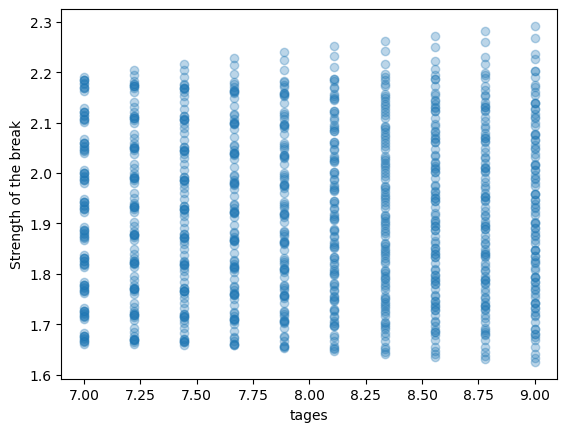

In [93]:
scatter(data_grid_params[:,:,:,4], data_grid_break[:,:,:,:], alpha=.3)

xlabel('tages')
ylabel('Strength of the break')
show()

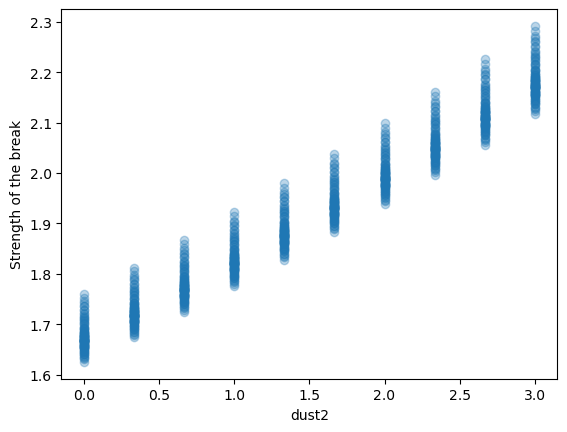

In [95]:
scatter(data_grid_params[:,:,:,3], data_grid_break, alpha=.3)

xlabel('dust2')
ylabel('Strength of the break')
show()

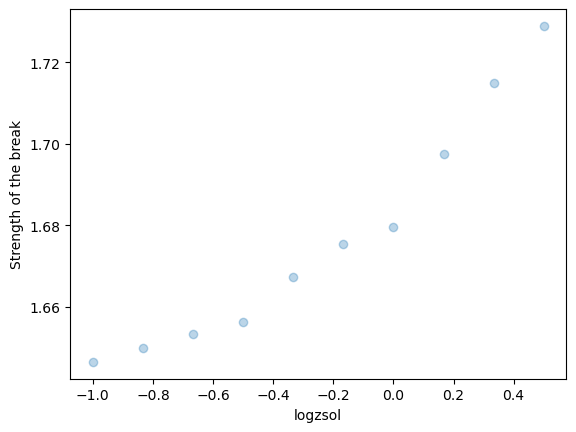

In [97]:
scatter(data_grid_params[:,0,5,2], data_grid_break[:,0,5,:], alpha=.3)

xlabel('logzsol')
ylabel('Strength of the break')
show()

--------------

In [51]:
# Find indexes for redshifted spectrum to grab the ranges to calculate the balmer break

a = 1.0 + run_params['zred']

n = 0
for i,s in enumerate(wspec<3620*a):
    if not s:
        print(s, n, wspec[i])
        break
    n+=1

n = 0
for i,s in enumerate(wspec<3720*a):
    if not s:
        print(s, n, wspec[i])
        break
    n+=1

n = 0
for i,s in enumerate(wspec<4000*a):
    if not s:
        print(s, n, wspec[i])
        break
    n+=1

n = 0
for i,s in enumerate(wspec<4100*a):
    if not s:
        print(s, n, wspec[i])
        break
    n+=1

False 382 16467.090045599998
False 493 16921.5534936
False 804 18194.8693332
False 915 18649.3327812


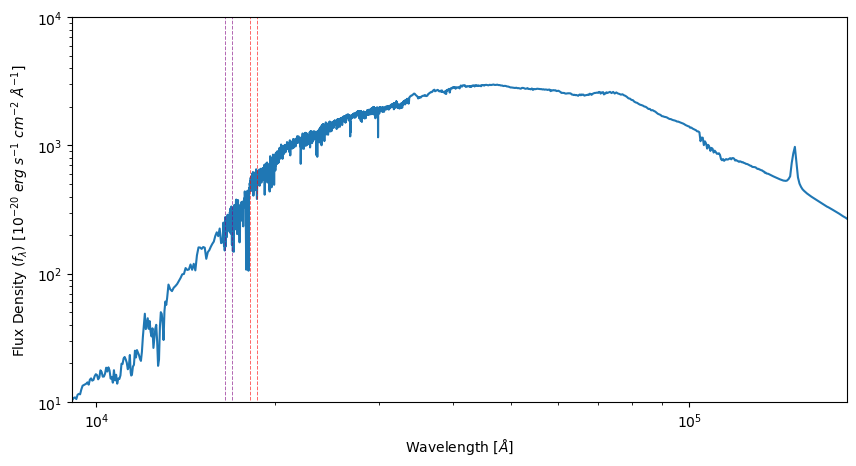

In [17]:
figure(figsize=(10,5))

loglog(wspec, data_grid_spec[5,-1,5,:])

plotBalmerBreak(**run_params)

xmin, xmax = 2000*a, 40500*a
ymin, ymax = 1e1, 1e4

xlim([xmin,xmax])
ylim([ymin,ymax])

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

show()

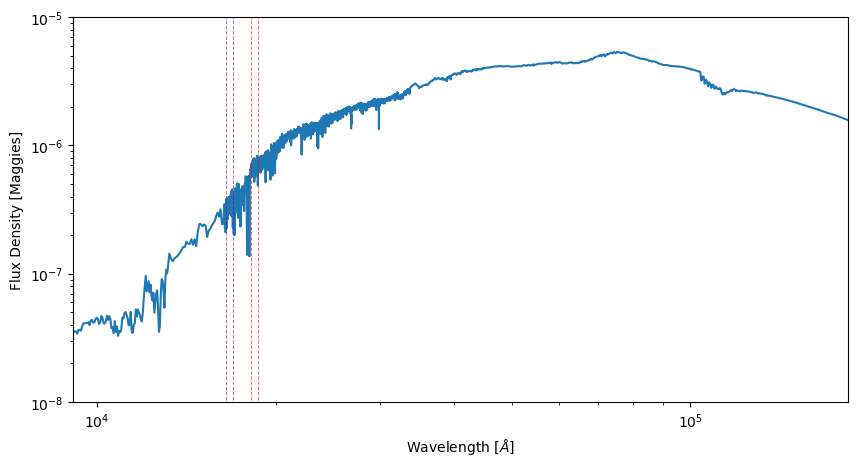

In [18]:
data_grid_spec = np.load('specs_sps_no_dust.npy')

a = 1.0 + run_params['zred']

figure(figsize=(10,5))

loglog(wspec, data_grid_spec[5,-1,5,:])

plotBalmerBreak(**run_params)

xmin, xmax = 2000*a, 40500*a
ymin, ymax = 1e-8, 1e-5

xlim([xmin,xmax])
ylim([ymin,ymax])

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density [Maggies]')

show()

In [98]:
data_grid_params.shape

(10, 10, 10, 5)

In [102]:
test = data_grid_params[0,:,:,:]
test

array([ 3.548e+00,  1.000e+08, -1.000e+00,  0.000e+00,  7.000e+00])

In [106]:
test = data_grid_break[0,:,:,0]

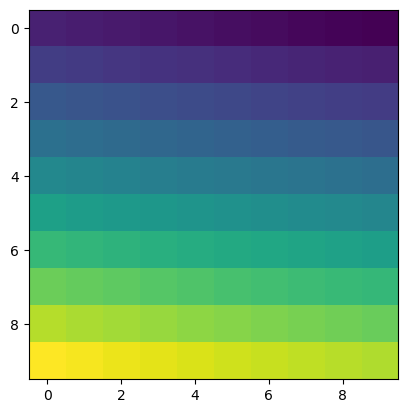

In [108]:
imshow(test)
show()

In [ ]:
origin = lower